# The Sparks Foundation - Data Science & Business Analytics
##### Task 3 : Perfect 'Exploratory Data Analysis' on dataset 'SampleSuperstore'. 
##### Dataset : https://bit.ly/3i4rbWl
##### Author : Nidhi Pandya          

## Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/np/Downloads/SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data preprocessing

In [4]:
data.shape

(9994, 13)

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.duplicated().sum()

17

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(9977, 13)

In [11]:
## Drop unnecessary data
data = data.drop(["Postal Code"], axis = 1)

In [12]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory data analysis

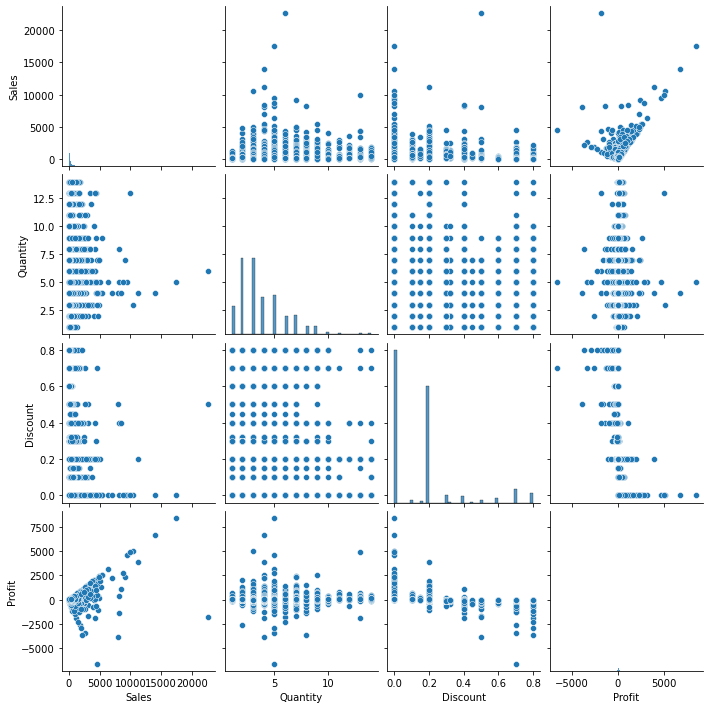

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
# finding the pairwise correlations between the columns and visualising using heatmaps
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


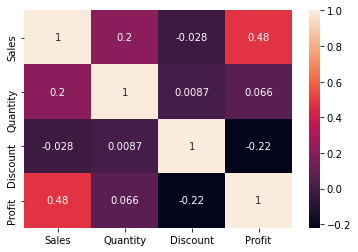

In [15]:
sns.heatmap(data.corr(), annot=True)
plt.show()

- Sales and Profit are Moderately Correlated.
- Quantity and Profit are less Moderately Correlated.
- Discount and Profit are Negatively Correlated.

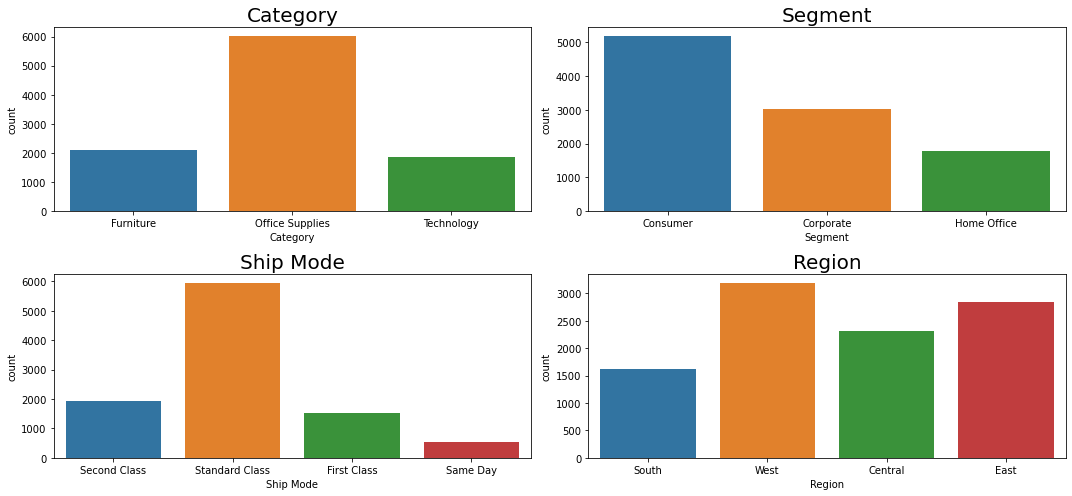

In [16]:
# Number of records (Counts)
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,7));

sns.countplot(data['Category'],ax=axs[0][0])
axs[0][0].set_title('Category',fontsize=20)

sns.countplot(data['Segment'],ax=axs[0][1])
axs[0][1].set_title('Segment',fontsize=20)

sns.countplot(data['Ship Mode'],ax=axs[1][0])
axs[1][0].set_title('Ship Mode',fontsize=20)

sns.countplot(data['Region'],ax=axs[1][1])
axs[1][1].set_title('Region',fontsize=20)

plt.tight_layout()

## [1] REGION :

In [17]:
reg = data.groupby("Region")["Sales","Profit","Discount"].mean()
reg

,Sales,Profit,Discount
Region,,,
Central,215.947759,17.100421,0.240250
East,238.465798,32.163905,0.145343
South,241.803645,28.857673,0.147253
West,227.139254,33.927281,0.109615


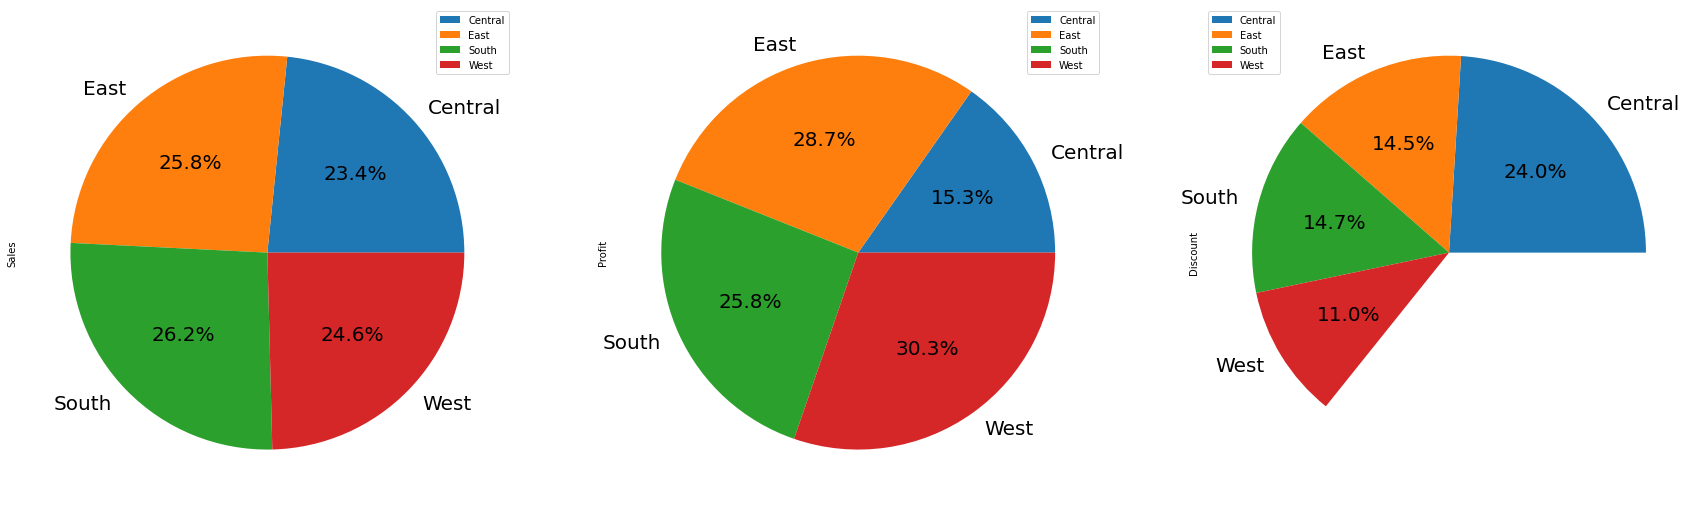

In [18]:
reg.plot.pie(subplots = True, 
               autopct = '%1.1f%%',
               figsize = (30,30),
               fontsize = 20,
               labels = reg.index)
plt.show()

- **West** region has the highest Profit.

## [2] STATE :

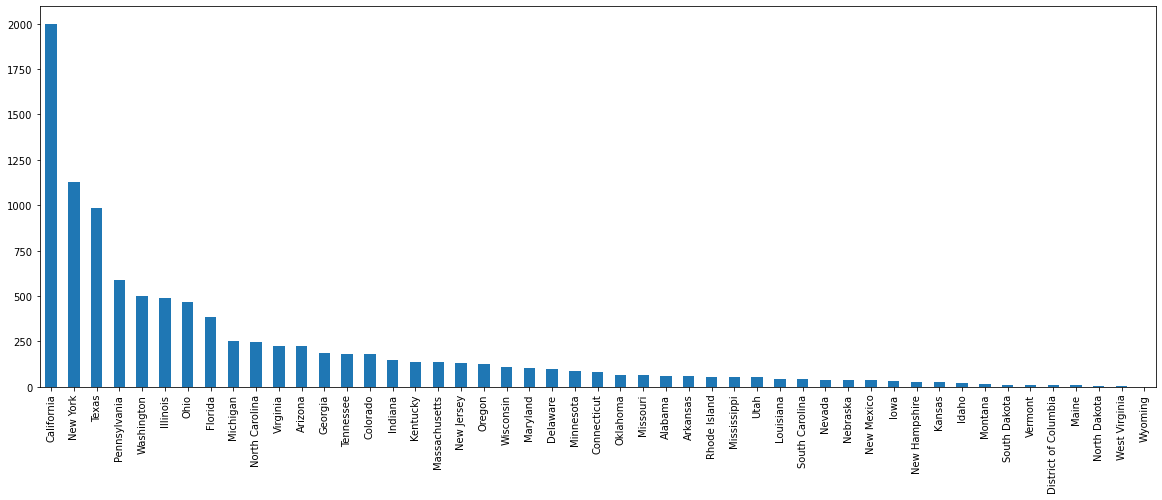

In [19]:
data["State"].value_counts().plot(kind= 'bar', figsize = (20,7))
plt.show()

- **Top 3 states where deals are highest :**
    1. California
    2. New York
    3. Texas
- **Lowest number of deals :** Wyoming

In [20]:
data["State"].value_counts().mean()

203.6122448979592

- Average number of deals per state is **204**.

In [21]:
states = data.groupby("State")["Sales", "Profit", "Discount"].mean()
states.head()

,Sales,Profit,Discount
State,,,
Alabama,319.846557,94.865989,0.000000
Arizona,157.508933,-15.303235,0.303571
Arkansas,194.635500,66.811452,0.000000
California,229.246629,38.241878,0.072946
Colorado,176.418231,-35.867351,0.316484


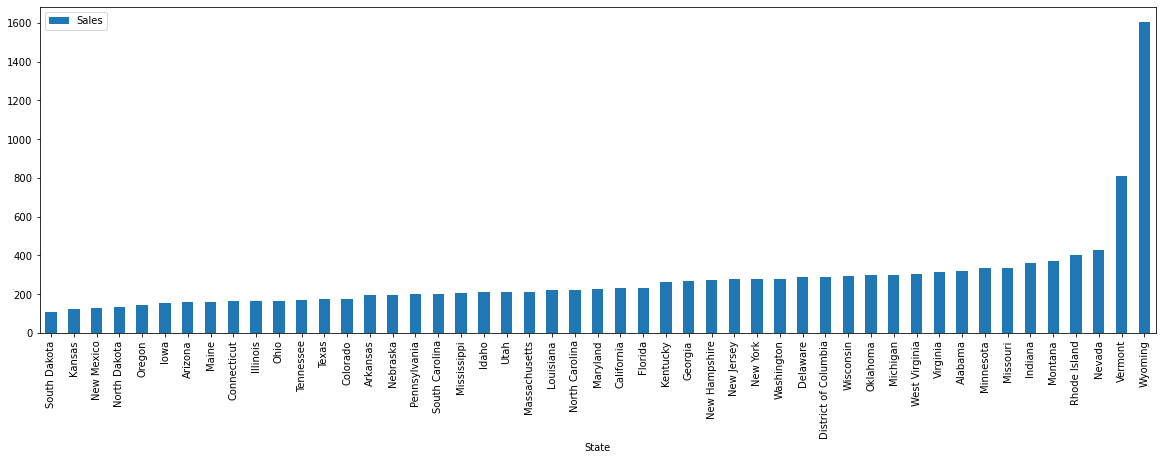

In [22]:
states_s = states.sort_values('Sales')
states_s[["Sales"]].plot(kind = 'bar', figsize = (20,6))
plt.show()

- **Highest sales :** Wyoming
- **Lowest sales :** South Dakota

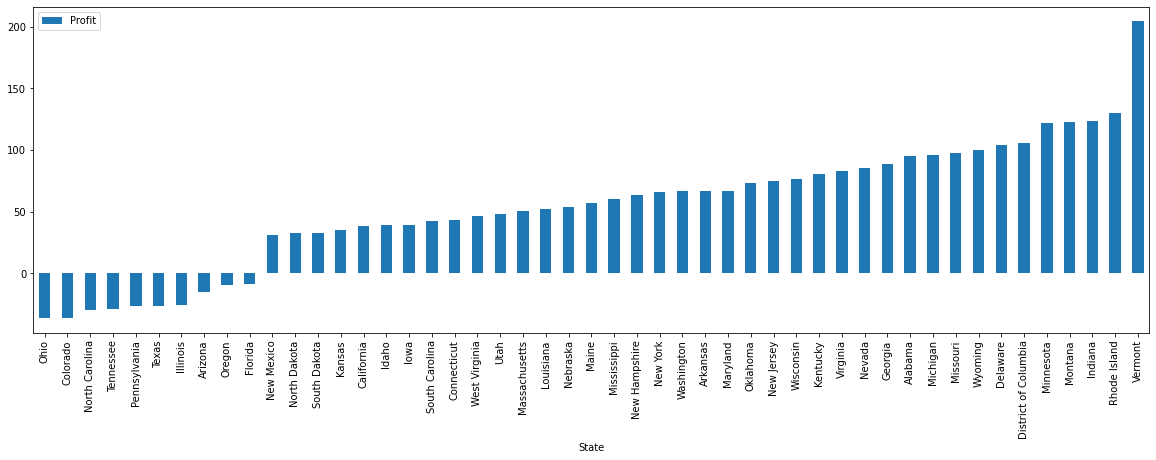

In [23]:
states_p = states.sort_values('Profit')
states_p[["Profit"]].plot(kind = 'bar', figsize = (20,6))
plt.show()

- **Highest profit :** Vermont
- **Lowest profit :** Ohio

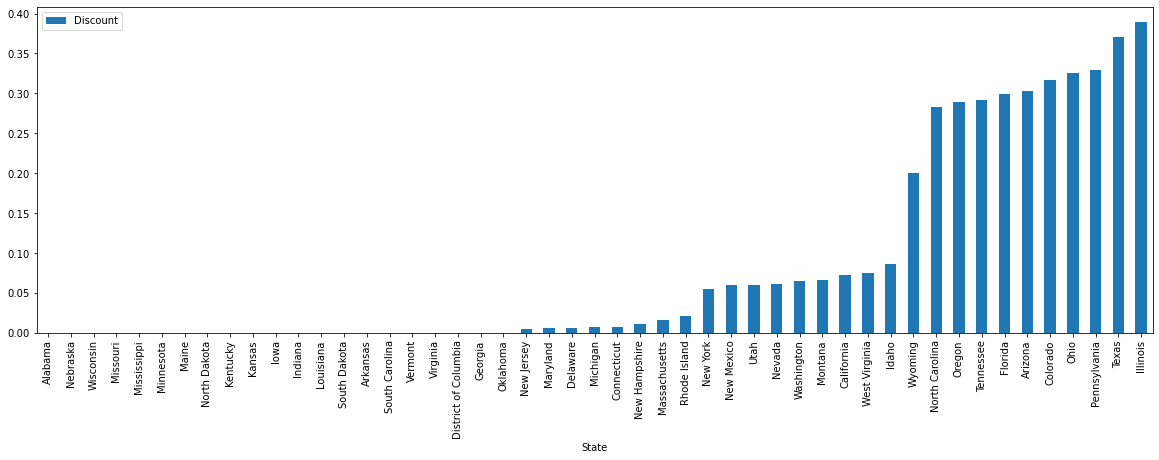

In [24]:
states_d = states.sort_values('Discount')
states_d[["Discount"]].plot(kind = 'bar', figsize = (20,6))
plt.show()

- **Top 2 states with high number of discounted products :**
    1. Illinois
    2. Texas

## [3] CITY :

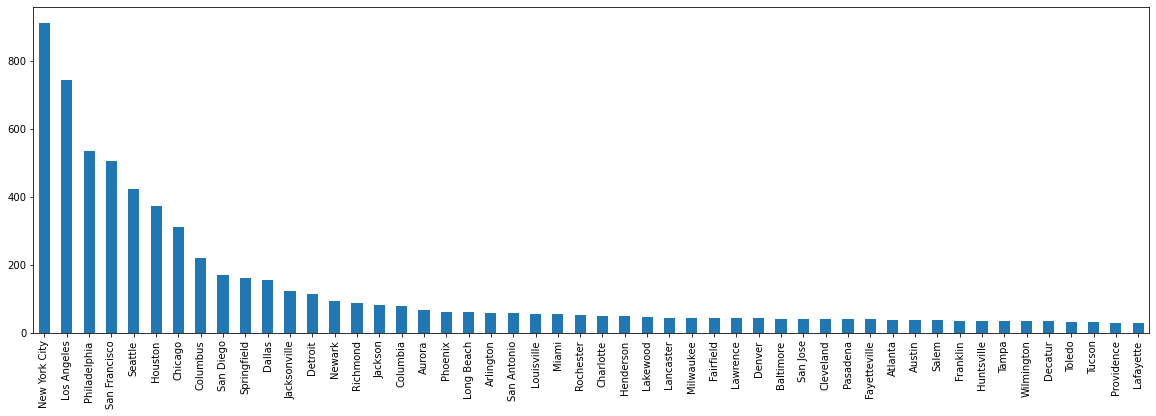

In [25]:
data["City"].value_counts().head(50).plot(kind = 'bar', figsize = (20,6))
plt.show()

- **Top 3 cities where deals are highest :**
    1. New York City
    2. Los Angeles 
    3. Philedalphia

In [26]:
data["City"].value_counts().mean()

18.789077212806028

- Average number of deals per city is **19**.

In [27]:
city = data.groupby("City")["Sales","Profit","Discount"].mean()
city.head()

,Sales,Profit,Discount
City,,,
Aberdeen,25.500000,6.630000,0.000000
Abilene,1.392000,-3.758400,0.800000
Akron,129.999333,-8.887410,0.357143
Albuquerque,158.582857,45.292007,0.057143
Alexandria,344.973125,19.913644,0.000000


<AxesSubplot:xlabel='City'>

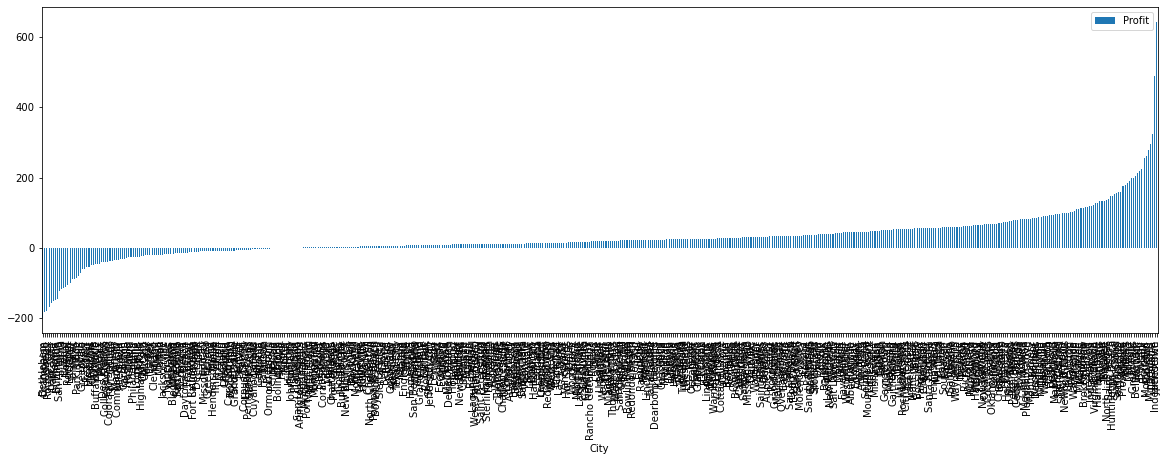

In [28]:
city_s = city.sort_values('Profit')
city_s[["Profit"]].plot(kind = 'bar', figsize = (20,6))
# Too crowded, so let's segregate this data.

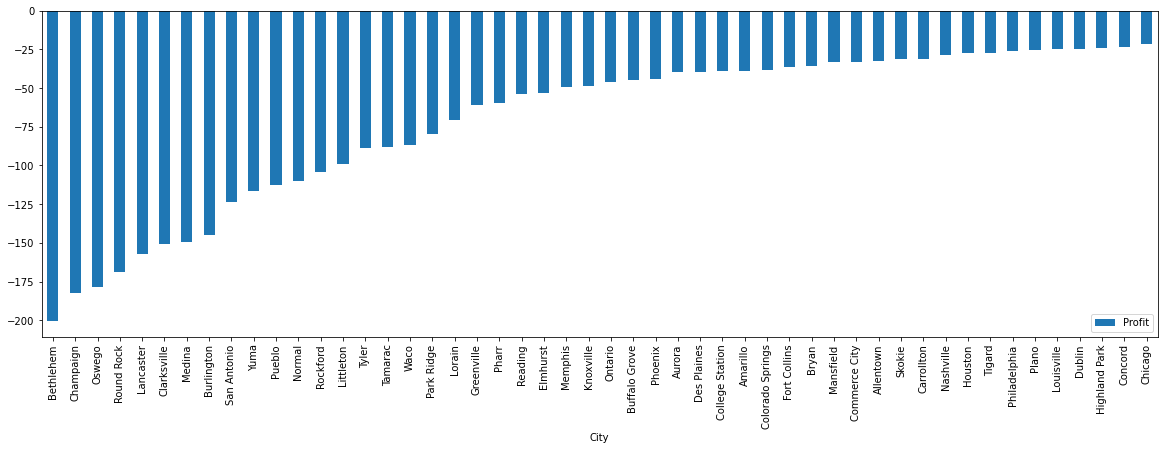

In [29]:
# 1. Lowest profit giving cities
city_s = city.sort_values('Profit').head(50)
city_s[["Profit"]].plot(kind = 'bar', figsize = (20,6))
plt.show()

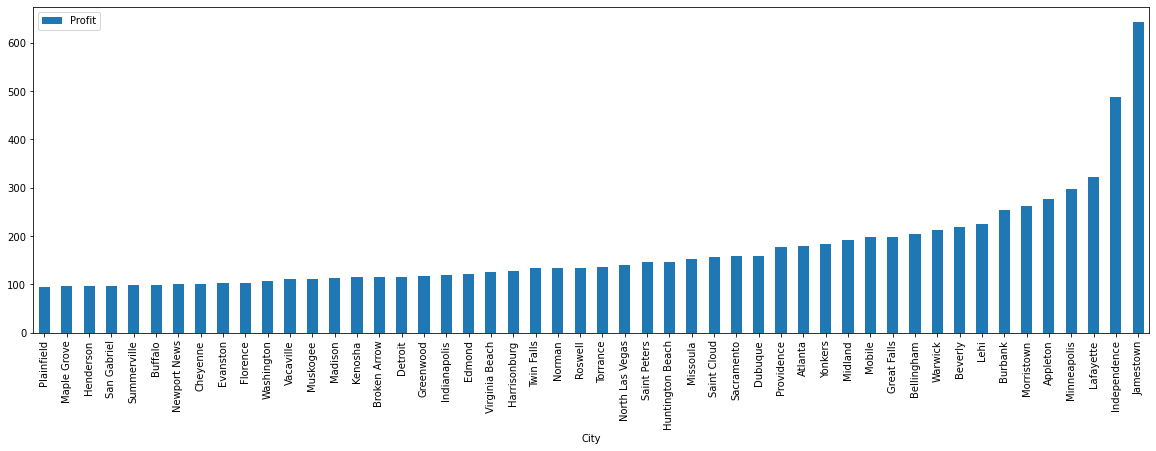

In [30]:
# 2. Highest profit giving cities
city_s = city.sort_values('Profit').tail(50)
city_s[["Profit"]].plot(kind = 'bar', figsize = (20,6))
plt.show()

- Balanced between cities giving positive profits (graph 2) and negative profits (graph 1)!
    * Check profit values

## [4] QUANTITY :

In [31]:
quant = data.groupby("Quantity")["Sales","Profit","Discount"].mean()
quant

,Sales,Profit,Discount
Quantity,,,
1,59.234632,8.276396,0.152959
2,120.377982,16.027769,0.154844
3,175.630896,23.720306,0.153321
4,272.779827,37.227971,0.158373
5,337.936339,40.257394,0.157146
6,362.101960,18.051517,0.166556
7,395.888393,56.579163,0.161980
8,458.210802,42.244342,0.171595
9,498.083683,68.557716,0.147946


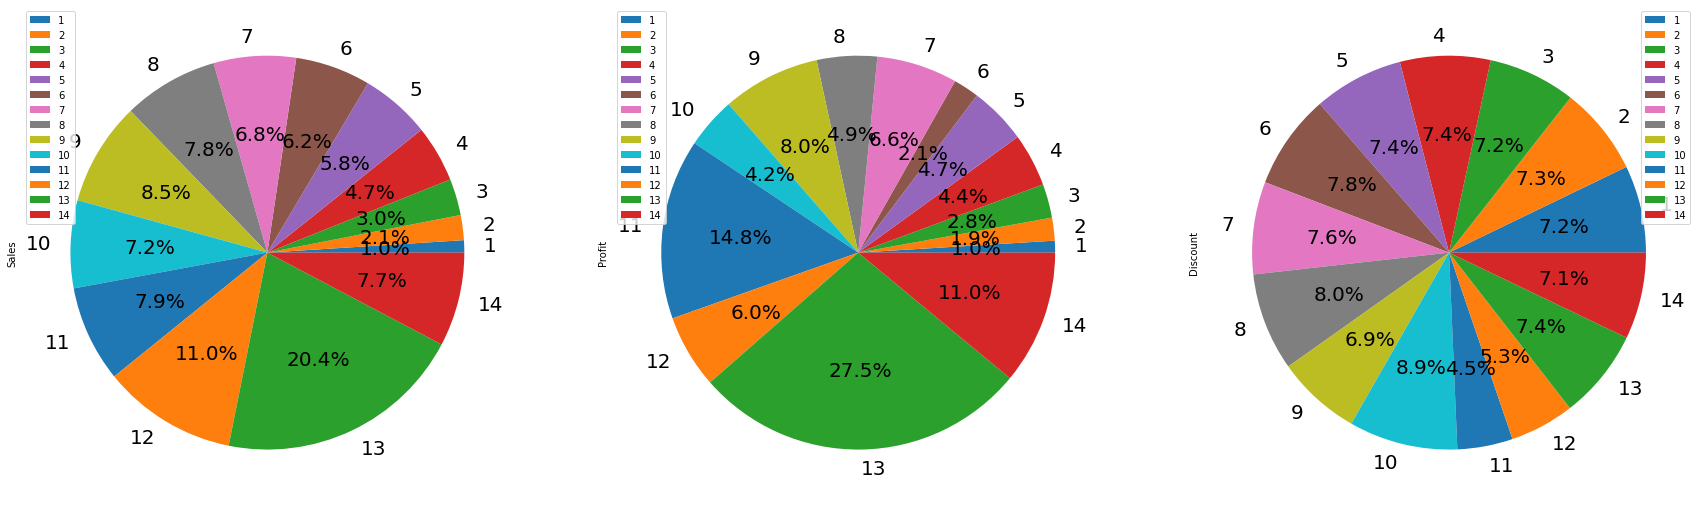

In [32]:
quant.plot.pie(subplots = True, 
               autopct = '%1.1f%%',
               figsize = (30,30),
               fontsize = 20,
               labels = quant.index)
plt.show()

- **13 number of Quantity** is highest for Sales and Profit.

## [5] CATEGORY :

In [33]:
category = data.groupby("Category")["Sales","Profit","Discount"].mean()
category

,Sales,Profit,Discount
Category,,,
Furniture,350.002981,8.697740,0.174027
Office Supplies,119.550107,20.353403,0.157385
Technology,452.709276,78.752002,0.132323


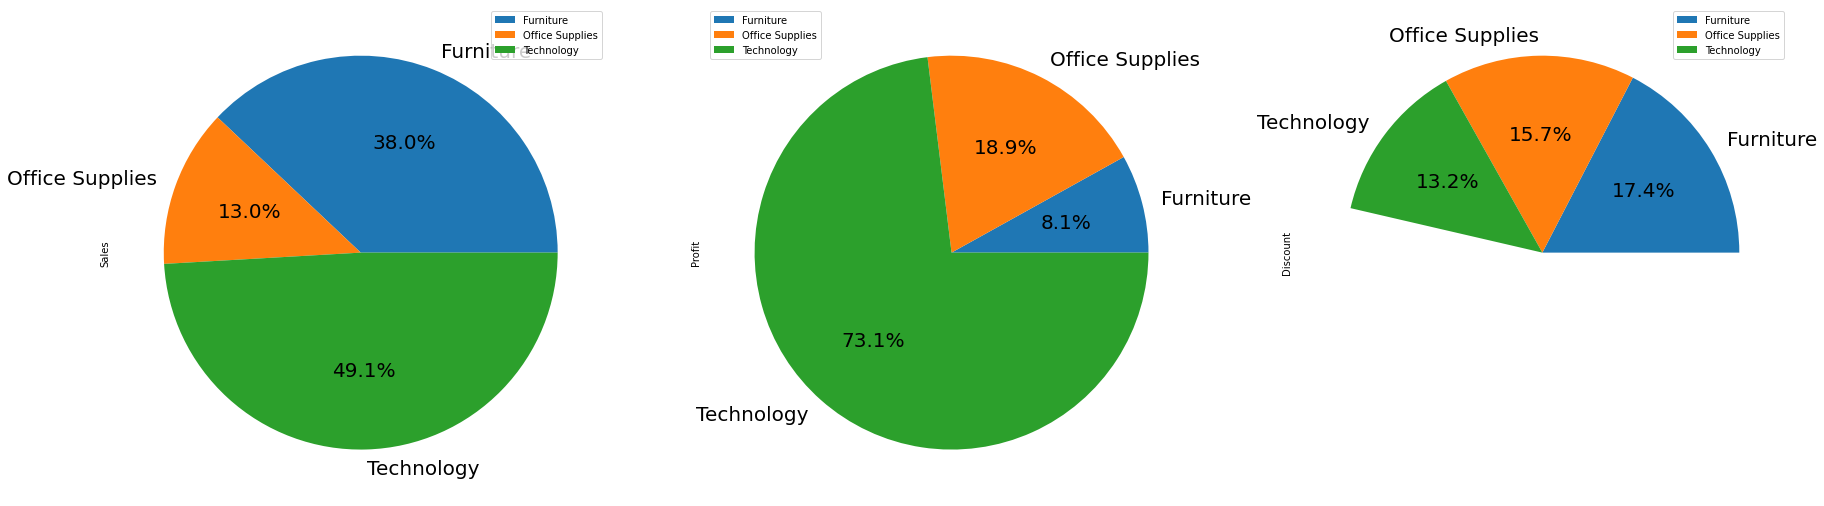

In [34]:
category.plot.pie(subplots = True, 
               autopct = '%1.1f%%',
               figsize = (30,30),
               fontsize = 20)
plt.show()

- Highest Sales and Profit obtained in **Technology**.
- Lowest Profit in **Furniture** due to **highest Disount**.

## [6] SUB-CATEGORY :

In [35]:
sub = data.groupby("Sub-Category")["Sales","Profit","Discount"].mean()
sub

,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.096896,8.207059,0.074969
Binders,133.645972,19.860710,0.372011
Bookcases,503.859633,-15.230509,0.211140
Chairs,532.971969,43.198582,0.170244
Copiers,2198.941618,817.909190,0.161765
Envelopes,64.867724,27.418019,0.080315
Fasteners,13.936774,4.375660,0.082028


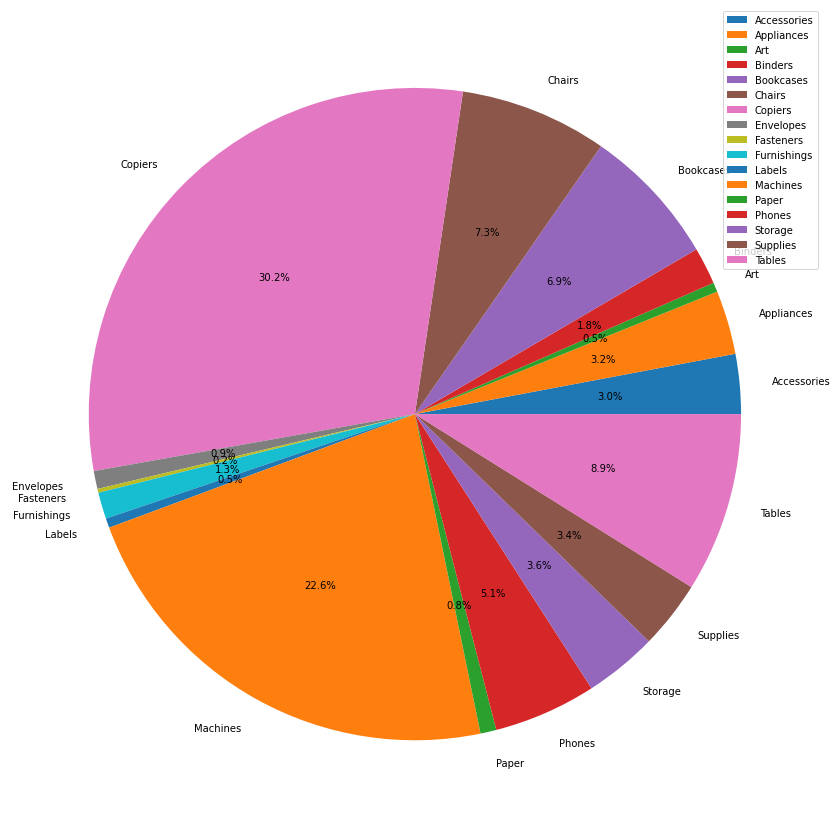

In [36]:
## Sales
plt.figure(figsize = (15,15))
plt.pie(sub['Sales'],
        labels = sub.index,
        autopct = '%1.1f%%')
plt.legend()
plt.show()

- **Top 2 highest Sales :** 
    1. Copiers
    2. Machines

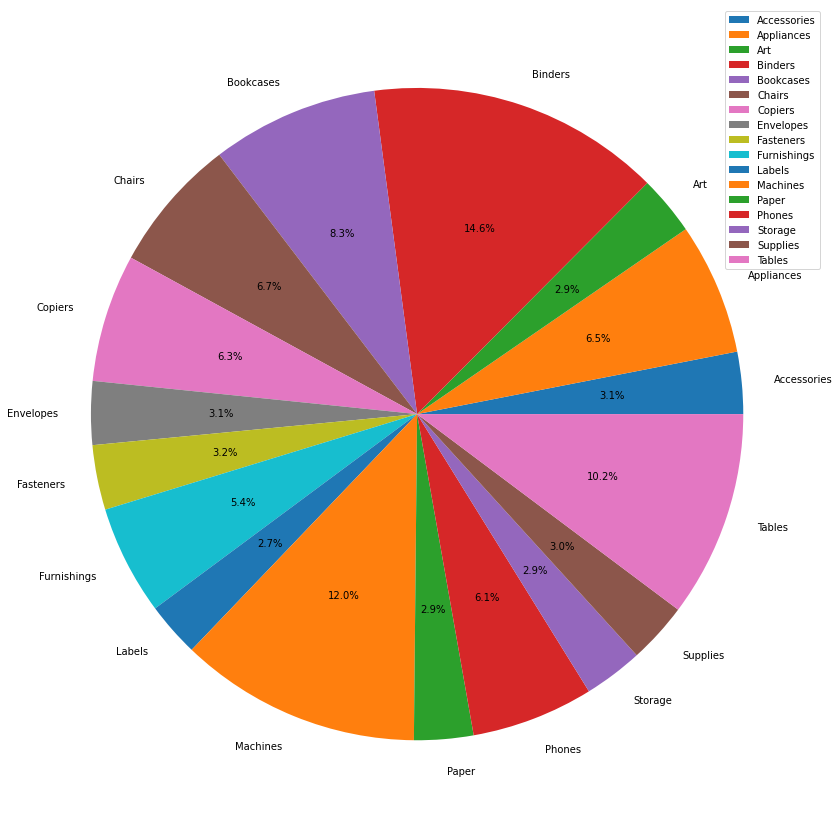

In [37]:
## Discount
plt.figure(figsize = (15,15))
plt.pie(sub['Discount'],
        labels = sub.index,
        autopct = '%1.1f%%')
plt.legend()
plt.show()

- **Top 3 discounted sub-categories :**
    1. Binders
    2. Machines
    3. Tables

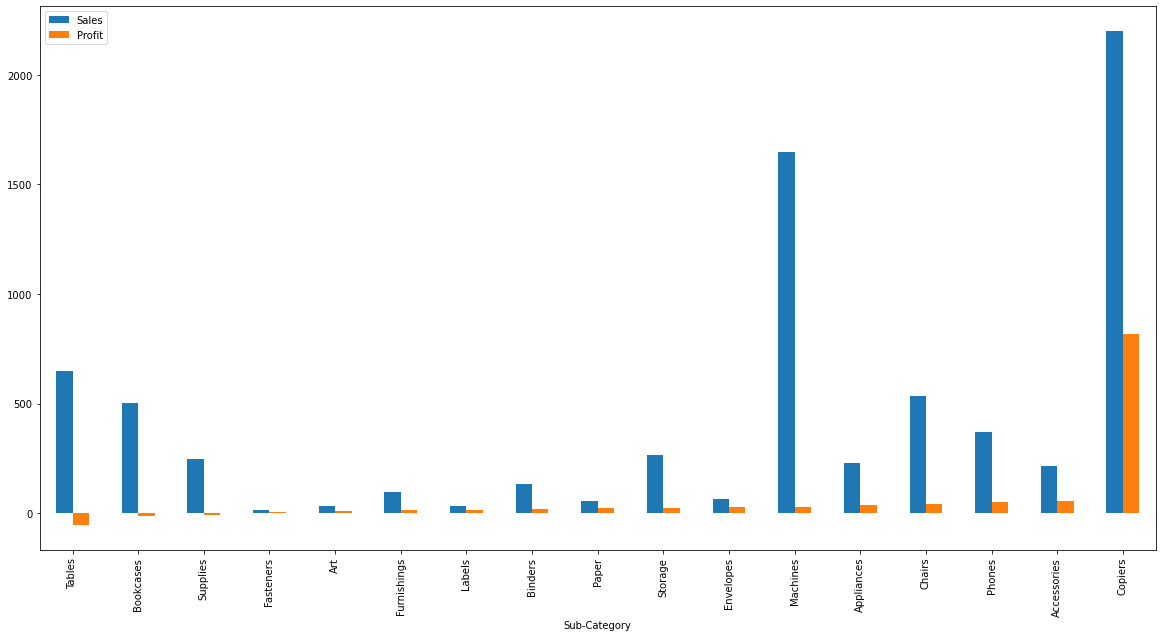

In [38]:
## Profit
sub.sort_values("Profit")[["Sales","Profit"]].plot(kind = 'bar', figsize = (20,10))
plt.show()

- **Highest Profit as well as Sales :** Copiers
- **Negative Profit :** Tables

## [7] SHIP MODE

In [39]:
ship = data.groupby("Ship Mode")["Sales","Profit","Discount"].mean()
ship

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.614490,31.850134,0.164587
Same Day,236.755950,29.283924,0.152675
Second Class,236.323750,29.565956,0.138626
Standard Class,227.928858,27.534715,0.160222


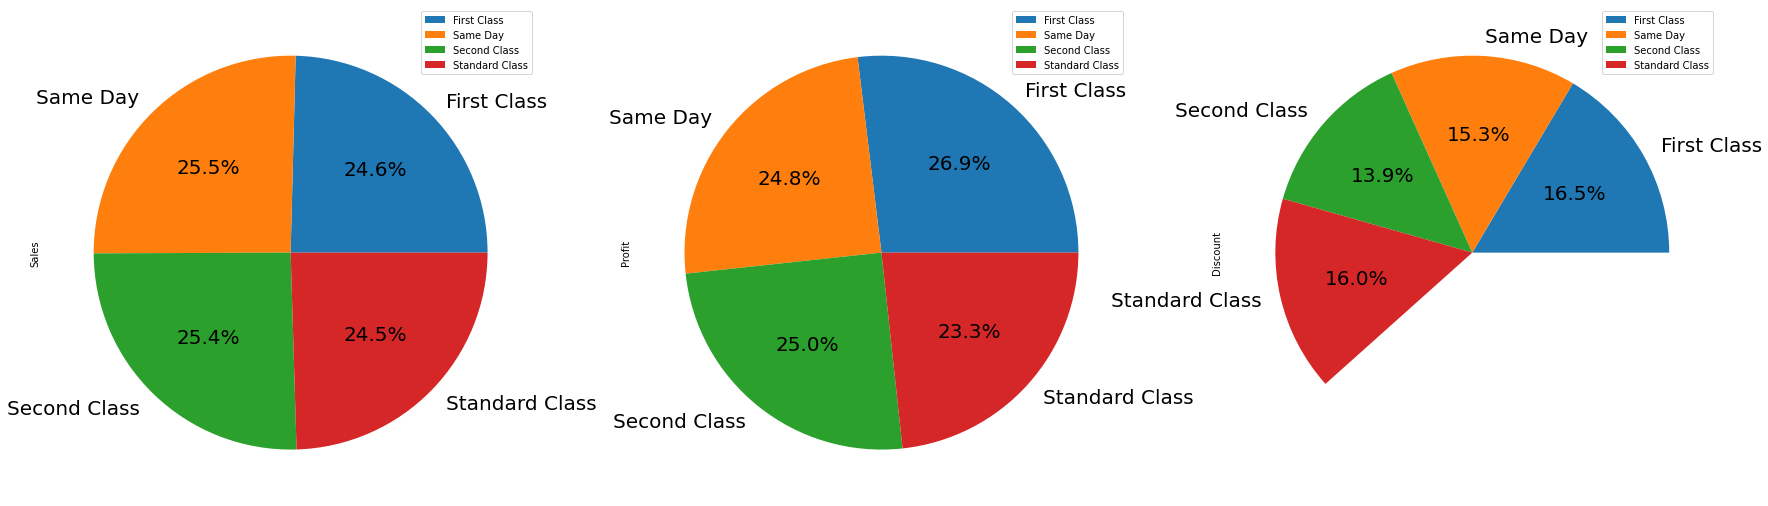

In [40]:
ship.plot.pie(subplots = True,
             autopct = '%1.1f%%',
             figsize = (30,30),
             fontsize = 20,
             labels = ship.index,
             )
plt.show()

- **Profit** and **Discount** high in **First Class**.
- **Sales** is high on **Same Day Ship**.

## RESULT & CONCLUSION

- Profit is more than that of sale but there are some areas where profit could be increased.
- Profit and Discount is high in First Class
- Sales is high for Same day ship
- Sub-category: Copier: High Profit & sales
- Sub-category: Binders , Machines and then tables have high Discount.
- Category: Maximun sales and Profit obtain in Technology.
- Category: Minimun profit obtain in Furniture
- State: Vermont: Highest Profit
- State: Ohio: Lowest Profit
- Segment: Home-office: High Profit & sales
- Here is top 3 city where deals are Highest.
    1. New York City
    2. Los Angeles
    3. Philadelphia
- Sales and Profit are Moderately Correlated.
- Quantity and Profit are less Moderately Correlated.
- Discount and Profit are Negatively Correlated
- Here is top 3 state where deals are Highest.
    1. Califonia
    2. New York
    3. Texas
- Wyoming : Lowest Number of deal
- Highest amount of sales: Wyoming
- Lowest amount of sales: South Dakota

## TASK 3 COMLETED!